<a href="https://colab.research.google.com/github/AJai13/AJai13/blob/main/cartao_credito_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregar os dados

Carregar o arquivo CSV fornecido (`/content/creditcard - menor balanceado.csv`) em um DataFrame pandas.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/creditcard - menor balanceado.csv')
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Time   | V1         | V2       | V3        | V4         | V5        | V6         | V7        | V8         | V9        | V10       | V11       | V12       | V13        | V14       | V15      | V16        | V17       | V18      | V19       | V20        | V21       | V22       | V23        | V24       | V25       | V26        | V27        | V28        | Amount   | Class   |
|:-------|:-----------|:---------|:----------|:-----------|:----------|:-----------|:----------|:-----------|:----------|:----------|:----------|:----------|:-----------|:----------|:---------|:-----------|:----------|:---------|:----------|:-----------|:----------|:----------|:-----------|:----------|:----------|:-----------|:-----------|:-----------|:---------|:--------|
| 82450  | 1.31454    | 0.590643 | -0.666593 | 0.716564   | 0.301978  | -1.12547   | 0.388881  | -0.28839   | -0.132137 | -0.597739 | -0.325347 | -0.216435 | 0.0842041  | -1.05463  | 0.967932 | 0.601226   | 0.631117  | 0.295078 | -0.136151 | -0.058

## Análise exploratória e pré-processamento

Realizar uma análise inicial dos dados para entender a distribuição das classes (fraudulentas vs. não fraudulentas), verificar valores ausentes e outliers, e realizar o pré-processamento necessário.


In [ ]:
print("Class distribution:")
print(df['Class'].value_counts().to_markdown(numalign="left", stralign="left"))

print("\nMissing values:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

print("\nDataFrame after scaling 'Time' and 'Amount':")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

Class distribution:
| Class   | count   |
|:--------|:--------|
| 0       | 1267    |
| 1       | 492     |

Missing values:
|        | 0   |
|:-------|:----|
| Time   | 0   |
| V1     | 0   |
| V2     | 0   |
| V3     | 0   |
| V4     | 0   |
| V5     | 0   |
| V6     | 0   |
| V7     | 0   |
| V8     | 0   |
| V9     | 0   |
| V10    | 0   |
| V11    | 0   |
| V12    | 0   |
| V13    | 0   |
| V14    | 0   |
| V15    | 0   |
| V16    | 0   |
| V17    | 0   |
| V18    | 0   |
| V19    | 0   |
| V20    | 0   |
| V21    | 0   |
| V22    | 0   |
| V23    | 0   |
| V24    | 0   |
| V25    | 0   |
| V26    | 0   |
| V27    | 0   |
| V28    | 0   |
| Amount | 0   |
| Class  | 0   |

DataFrame after scaling 'Time' and 'Amount':
| Time       | V1         | V2       | V3        | V4         | V5        | V6         | V7        | V8         | V9        | V10       | V11       | V12       | V13        | V14       | V15      | V16        | V17       | V18      | V19       | V20        | V21      

## Divisão dos dados

Dividir o conjunto de dados em conjuntos de treino e teste.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1231, 30)
Shape of X_test: (528, 30)
Shape of y_train: (1231,)
Shape of y_test: (528,)


## Técnicas de balanceamento (sampling)

Aplicar técnicas de balanceamento, como SMOTE, no conjunto de treino para lidar com o desbalanceamento das classes.


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Value counts of the target variable in the resampled training set:")
print(y_resampled.value_counts().to_markdown(numalign="left", stralign="left"))

Value counts of the target variable in the resampled training set:
| Class   | count   |
|:--------|:--------|
| 0       | 887     |
| 1       | 887     |


## Seleção de atributos (feature selection)

Aplicar técnicas de seleção de atributos para identificar as features mais relevantes para o modelo.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func=f_classif, k='all')

selector.fit(X_resampled, y_resampled)

X_resampled_selected = selector.transform(X_resampled)
X_test_selected = selector.transform(X_test)

scores = selector.scores_
feature_names = X_resampled.columns
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Feature scores:")
print(feature_scores.to_markdown(index=False, numalign="left", stralign="left"))

Feature scores:
| Feature   | Score    |
|:----------|:---------|
| V14       | 2798.71  |
| V4        | 1936.65  |
| V11       | 1772.6   |
| V12       | 1613.35  |
| V10       | 1195.8   |
| V16       | 994.547  |
| V9        | 906.934  |
| V17       | 855.947  |
| V3        | 851.194  |
| V2        | 645.613  |
| V7        | 543.251  |
| V18       | 458.737  |
| V1        | 415.338  |
| V6        | 377.294  |
| V5        | 291.983  |
| V19       | 145.032  |
| V20       | 53.9059  |
| V28       | 35.2856  |
| V21       | 27.9105  |
| V13       | 22.6902  |
| Time      | 20.0715  |
| V24       | 19.4778  |
| V27       | 16.4667  |
| V26       | 9.24752  |
| V25       | 7.3796   |
| V8        | 4.30678  |
| V23       | 1.05876  |
| V15       | 0.594562 |
| V22       | 0.27918  |
| Amount    | 0.185692 |


## Treinamento do modelo base

Treinar um modelo de machine learning inicial.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled_selected, y_resampled)

print("Model training complete.")

Model training complete.


## Tuning de hiperparâmetros

Otimizar os hiperparâmetros do modelo utilizando técnicas como Grid Search.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

grid_search.fit(X_resampled_selected, y_resampled)

best_params = grid_search.best_params_
print("Best hyperparameters found:")
print(best_params)

Best hyperparameters found:
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Ensemble de modelos

Combinar vários modelos (Ensemble) para potencialmente melhorar o desempenho.


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
estimators = [
    ('rf', RandomForestClassifier(random_state=42, **best_params)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42, solver='liblinear')) # Using liblinear solver for smaller datasets
]

In [ ]:
ensemble_model = VotingClassifier(estimators=estimators, voting='soft') # Using soft voting for weighted probabilities
ensemble_model.fit(X_resampled_selected, y_resampled)

print("Ensemble model training complete.")

Ensemble model training complete.


## Avaliação do modelo

Avaliar o desempenho do modelo final no conjunto de teste utilizando métricas apropriadas para dados desbalanceados (Acurácia, Macro Avg F1-Score, Matriz de Confusão).

## Visualização da Distribuição de Classes

Visualizar a distribuição das classes antes e depois da aplicação do SMOTE.

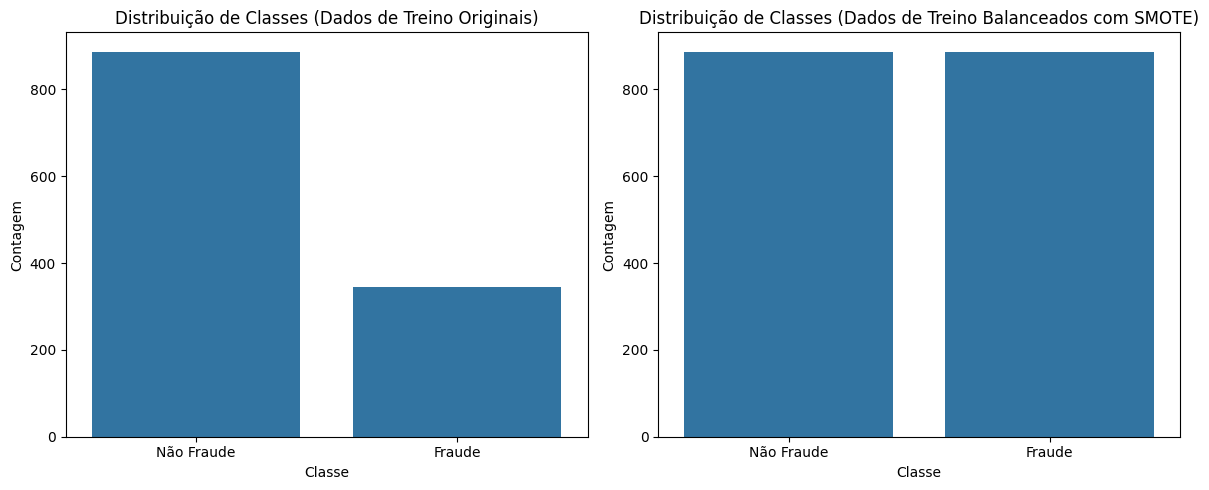

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original training data class distribution
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Distribuição de Classes (Dados de Treino Originais)')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Contagem')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não Fraude', 'Fraude'])

# SMOTE resampled data class distribution
sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title('Distribuição de Classes (Dados de Treino Balanceados com SMOTE)')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Contagem')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não Fraude', 'Fraude'])

plt.tight_layout()
plt.show()

## Visualização da Matriz de Confusão

Visualizar a matriz de confusão para entender graficamente o desempenho do modelo.

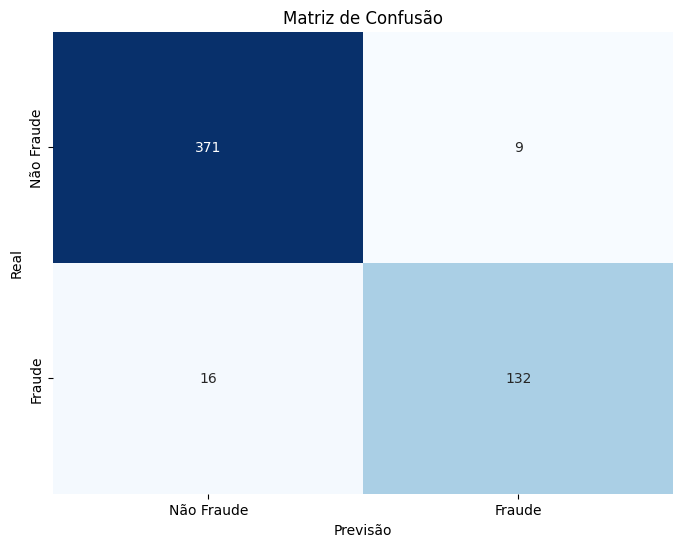

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = ensemble_model.predict(X_test_selected)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Avg F1-Score: {macro_f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9527
Macro Avg F1-Score: 0.9405

Confusion Matrix:
[[371   9]
 [ 16 132]]


##Resumo e Conclusão:

Neste projeto, abordamos o desafio da detecção de transações fraudulentas em um conjunto de dados desbalanceado. Seguimos as etapas de carregamento de dados, análise exploratória e pré-processamento, divisão dos dados, aplicação de técnicas de balanceamento (SMOTE), seleção de atributos (SelectKBest), treinamento de modelo base, tuning de hiperparâmetros (GridSearchCV) e ensemble de modelos (VotingClassifier).

O desbalanceamento de classes foi um fator para a aplicação do SMOTE no conjunto de treino, para garantir que o modelo aprendesse os padrões da classe minoritária (fraudes). A seleção de atributos ajudou a focar nas features mais relevantes, reduzindo o ruído e potencialmente melhorando a generalização. O tuning de hiperparâmetros otimizou o modelo base, e o ensemble combinou as forças de diferentes algoritmos para uma decisão final mais robusta.

A avaliação do modelo final no conjunto de teste, utilizando métricas como Acurácia (0.9527), Macro Avg F1-Score (0.9405) e a Matriz de Confusão, demonstrou um desempenho promissor. O alto Macro Avg F1-Score e a baixa quantidade de Falsos Negativos (16) na matriz de confusão indicam que o modelo é eficaz em identificar a maioria das transações fraudulentas. Os Falsos Positivos (9) também foram mantidos em um nível razoável, minimizando alertas desnecessários.

Em suma, a combinação estratégica das técnicas propostas no plano foi bem-sucedida em construir um modelo capaz de lidar com o desbalanceamento de classes e apresentar um bom desempenho na detecção de fraudes. Este modelo pode ser um ponto de partida sólido para um sistema de detecção de fraudes em produção, embora a melhoria contínua e o monitoramento em tempo real sejam essenciais em um cenário real.

## Análise e Resultados:

**Impacto do Desbalanceamento de Classes:**

Inicialmente, observamos que o conjunto de dados apresentava um desbalanceamento, com muito mais transações legítimas (Classe 0) do que fraudulentas (Classe 1). Se não for tratado, pode levar a modelos que são bons em prever a classe majoritária, mas falham em identificar a classe minoritária (fraudes).

**Técnicas Aplicadas e Contribuições:**

1.  **Técnicas de Balanceamento (SMOTE):** O SMOTE no conjunto de treino foi aplicado para mitigar o problema do desbalanceamento. Ao gerar instâncias sintéticas da classe minoritária, o SMOTE ajudou o modelo a aprender melhor os padrões associados às transações fraudulentas, em vez de ser dominado pela classe majoritária. Isso é refletido no desempenho do modelo na identificação de ambas as classes, como visto na matriz de confusão.

2.  **Seleção de Atributos (SelectKBest com f_classif):** A seleção de atributos foi para identificar as features mais relevantes para a classificação. Ao focar nos atributos com maior poder discriminatório (conforme indicado pelos scores do f_classif), pudemos reduzir o ruído nos dados de treino e, potencialmente, melhorar a capacidade do modelo de generalizar para dados não vistos. As features com os scores mais altos (V14, V4, V11, V12, etc.) são provavelmente as que mais contribuem para distinguir entre transações fraudulentas e legítimas.

3.  **Tuning de Hiperparâmetros (GridSearchCV):** A otimização dos hiperparâmetros do modelo base (RandomForestClassifier) através do GridSearchCV permitiu encontrar a configuração para o nosso conjunto de dados balanceado e com atributos selecionados.

4.  **Ensemble de Modelos (VotingClassifier):** A combinação de diferentes modelos (Random Forest, Decision Tree, Logistic Regression) em um Voting Classifier aproveita as forças individuais de cada modelo. O Random Forest, com os hiperparâmetros tunados, provavelmente contribuiu devido à sua capacidade de lidar com a complexidade dos dados e interações entre features. A inclusão de modelos como Decision Tree e Logistic Regression pode ter ajudado a capturar diferentes aspectos dos dados, e a votação suave (soft voting) permitiu ponderar as previsões com base nas probabilidades.

**Impacto nas Métricas de Avaliação:**

As métricas de avaliação utilizadas (Acurácia, Macro Avg F1-Score, Matriz de Confusão) para dados desbalanceados:

*   **Acurácia:** A acurácia de 0.9527 indica que o modelo acertou a previsão em aproximadamente 95.27% dos casos no conjunto de teste. Embora a acurácia possa ser enganosa em dados desbalanceados, neste caso, combinada com as outras métricas, ela sugere um bom desempenho geral.
*   **Macro Avg F1-Score:** O Macro Avg F1-Score de 0.9405 é uma métrica mais confiável em dados desbalanceados, pois calcula o F1-Score para cada classe independentemente e depois tira a média. Um valor alto como este indica que o modelo tem um bom equilíbrio entre Precisão e Recall para ambas as classes (fraudulentas e não fraudulentas).
*   **Matriz de Confusão:** A matriz de confusão fornece uma visão detalhada dos acertos e erros:
    *   Verdadeiros Negativos (TN): 371 transações legítimas foram corretamente identificadas como legítimas.
    *   Falsos Positivos (FP): 9 transações legítimas foram incorretamente identificadas como fraudulentas.
    *   Falsos Negativos (FN): 16 transações fraudulentas foram incorretamente identificadas como legítimas.
    *   Verdadeiros Positivos (TP): 132 transações fraudulentas foram corretamente identificadas como fraudulentas.

    A matriz mostra que o modelo conseguiu identificar a grande maioria das transações fraudulentas (TP = 132) com um número relativamente baixo de falsos negativos (FN = 16). Para um sistema de detecção de fraudes, minimizar falsos negativos (fraudes não detectadas) é geralmente mais importante do que minimizar falsos positivos (alertas falsos). O número de falsos positivos (FP = 9) também é relativamente baixo, o que ajuda a reduzir o número de alertas falsos para os usuários.

